Training Logistic Regression...

Logistic Regression Classification Report on Validation Data:

              precision    recall  f1-score   support

           0       0.33      0.17      0.22         6
           1       0.50      0.71      0.59         7

    accuracy                           0.46        13
   macro avg       0.42      0.44      0.41        13
weighted avg       0.42      0.46      0.42        13

Confusion Matrix for Logistic Regression on Validation Data:
[[1 5]
 [2 5]]
Training k-NN...

k-NN Classification Report on Validation Data:

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         6
           1       1.00      0.14      0.25         7

    accuracy                           0.54        13
   macro avg       0.75      0.57      0.46        13
weighted avg       0.77      0.54      0.44        13

Confusion Matrix for k-NN on Validation Data:
[[6 0]
 [6 1]]
Training Decision Tree...

Decision Tree Classi

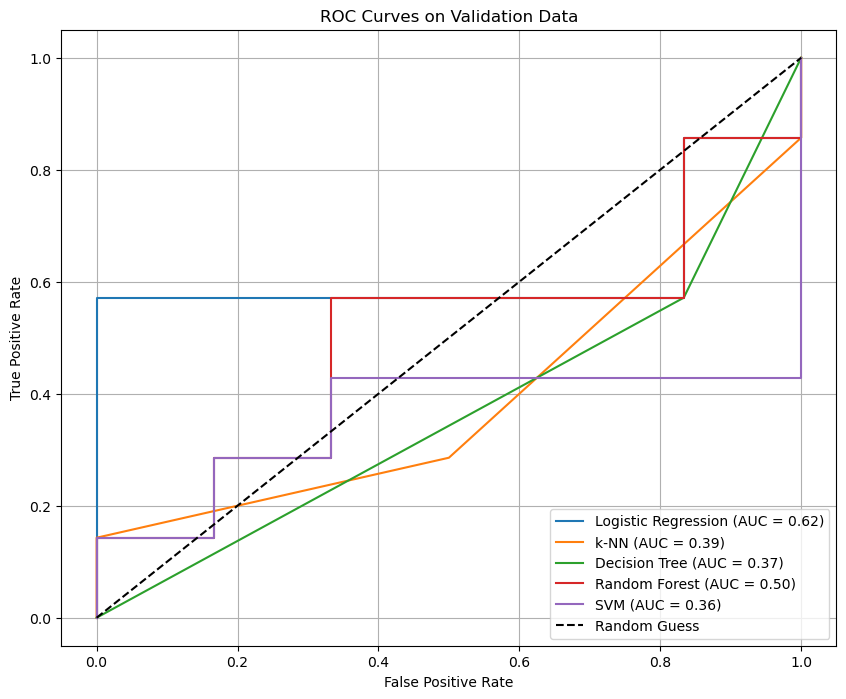


Evaluating models on the test dataset...

Evaluating Logistic Regression on the test data...

Logistic Regression Classification Report on Test Data:

              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       1.00      0.33      0.50         3

    accuracy                           0.50         4
   macro avg       0.67      0.67      0.50         4
weighted avg       0.83      0.50      0.50         4

Confusion Matrix for Logistic Regression on Test Data:
[[1 0]
 [2 1]]
Evaluating k-NN on the test data...

k-NN Classification Report on Test Data:

              precision    recall  f1-score   support

           0       0.25      1.00      0.40         1
           1       0.00      0.00      0.00         3

    accuracy                           0.25         4
   macro avg       0.12      0.50      0.20         4
weighted avg       0.06      0.25      0.10         4

Confusion Matrix for k-NN on Test Data:
[[1 0

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


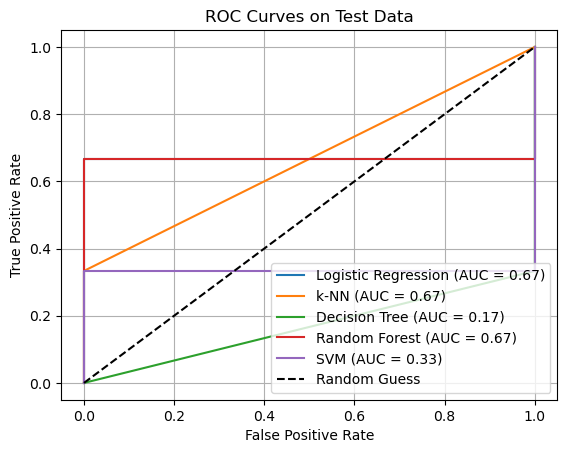

In [8]:
from sklearn.cluster import KMeans
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Function to load images from a dataset


def load_images(directory, target_size=(64, 64)):
    """
    Loads images from the given directory and normalizes pixel values.

    Args:
        directory (str): Path to the dataset directory.
        target_size (tuple): Target size to resize images (default: (64, 64)).

    Returns:
        np.array: Array of images.
        np.array: Corresponding labels.
    """
    images = []
    labels = []
    for label in ["good", "bad"]:  # Subdirectories for 'good' and 'bad'
        path = os.path.join(directory, label)
        if not os.path.exists(path):
            print(f"Directory {path} not found. Please check the dataset structure.")
            continue
        for file in os.listdir(path):
            try:
                img = load_img(os.path.join(path, file),
                               target_size=target_size)
                img_array = img_to_array(img) / 255.0  # Normalize pixel values
                images.append(img_array)
                labels.append(0 if label == "bad" else 1)
            except Exception as e:
                print(f"Error loading image {file}: {e}")
    return np.array(images), np.array(labels)


# Path to the training dataset
train_data_dir = "pcb_data/train"  # Replace with your training folder path

# Load and preprocess training data
X, y = load_images(train_data_dir)

# Ensure data is loaded correctly
if len(X) == 0 or len(y) == 0:
    raise ValueError(
        "No images loaded. Please check the dataset structure and path.")

# Flatten images for traditional ML algorithms
X_flattened = X.reshape(X.shape[0], -1)

# Split the data into training and validation sets with stratified splitting
X_train, X_val, y_train, y_val = train_test_split(
    X_flattened, y, test_size=0.2, random_state=42, stratify=y
)

# Define classification models
models = {
    "Logistic Regression": LogisticRegression(),
    "k-NN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(kernel='linear', probability=True)
}

# Train models and evaluate performance on the validation set
results = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    y_val_proba = model.predict_proba(X_val)[:, 1] if hasattr(
        model, "predict_proba") else None

    print(f"\n{name} Classification Report on Validation Data:\n")
    print(classification_report(y_val, y_val_pred))
    print(f"Confusion Matrix for {name} on Validation Data:\n{confusion_matrix(y_val, y_val_pred)}")

    # Store results for later evaluation
    results[name] = {"y_pred": y_val_pred, "y_proba": y_val_proba}

# Plot ROC Curves for validation data
plt.figure(figsize=(10, 8))
for name, result in results.items():
    if result["y_proba"] is not None:
        fpr, tpr, _ = roc_curve(y_val, result["y_proba"])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curves on Validation Data")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Path to the test dataset
test_data_dir = "pcb_data/test"  # Replace with your test folder path

# Load and preprocess test data
X_test_images, y_test = load_images(test_data_dir)
if len(X_test_images) == 0 or len(y_test) == 0:
    raise ValueError(
        "No test images loaded. Please check the test dataset structure.")

X_test_flattened = X_test_images.reshape(X_test_images.shape[0], -1)

# Evaluate models on the test dataset
print("\nEvaluating models on the test dataset...\n")
for name, model in models.items():
    print(f"Evaluating {name} on the test data...")
    y_test_pred = model.predict(X_test_flattened)
    y_test_proba = model.predict_proba(X_test_flattened)[
        :, 1] if hasattr(model, "predict_proba") else None

    print(f"\n{name} Classification Report on Test Data:\n")
    print(classification_report(y_test, y_test_pred))
    print(f"Confusion Matrix for {name} on Test Data:\n{confusion_matrix(y_test, y_test_pred)}")

    # Optional: Plot ROC Curve for test data
    if y_test_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_test_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Plot ROC Curves for test data
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curves on Test Data")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()


Found 64 images belonging to 2 classes.
Found 3 images belonging to 2 classes.


/opt/homebrew/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.5938 - loss: 0.8843

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.5938 - loss: 0.8843 - val_accuracy: 0.3333 - val_loss: 0.9661
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4219 - loss: 1.0952

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.4219 - loss: 1.0952 - val_accuracy: 0.3333 - val_loss: 0.8354
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5000 - loss: 1.0751

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5000 - loss: 1.0751 - val_accuracy: 0.3333 - val_loss: 0.7800
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4219 - loss: 1.2367

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.4219 - loss: 1.2367 - val_accuracy: 0.3333 - val_loss: 0.7057
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5938 - loss: 1.0207

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5938 - loss: 1.0207 - val_accuracy: 0.6667 - val_loss: 0.6914
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5312 - loss: 0.9210

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5312 - loss: 0.9210 - val_accuracy: 0.6667 - val_loss: 0.6718
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5625 - loss: 0.9405

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5625 - loss: 0.9405 - val_accuracy: 0.6667 - val_loss: 0.6312
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5625 - loss: 0.9012

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5625 - loss: 0.9012 - val_accuracy: 0.6667 - val_loss: 0.5918
Epoch 9/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5156 - loss: 0.8603

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5156 - loss: 0.8603 - val_accuracy: 0.6667 - val_loss: 0.5879
Epoch 10/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.6250 - loss: 0.8624 - val_accuracy: 0.6667 - val_loss: 0.6251
Epoch 11/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6562 - loss: 0.8097

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.6562 - loss: 0.8097 - val_accuracy: 0.6667 - val_loss: 0.5718
Epoch 12/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.4531 - loss: 1.0980 - val_accuracy: 0.6667 - val_loss: 0.5955
Epoch 13/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5312 - loss: 1.0068 - val_accuracy: 0.6667 - val_loss: 0.5899
Epoch 14/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5938 - loss: 0.9454 - val_accuracy: 0.6667 - val_loss: 0.6040
Epoch 15/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5938 - loss: 0.9040 - val_accuracy: 0.6667 - val_loss: 0.5759
Epoch 16/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5938 - loss: 0.9606 - val_accuracy: 0.6667 - val_loss: 0.5806
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.6667 - loss: 0.5718
Test Loss: 0.5718, Test Accuracy: 0.6667
Plot saved as 'training_plot_5.png' in the 'accuracy' folder.


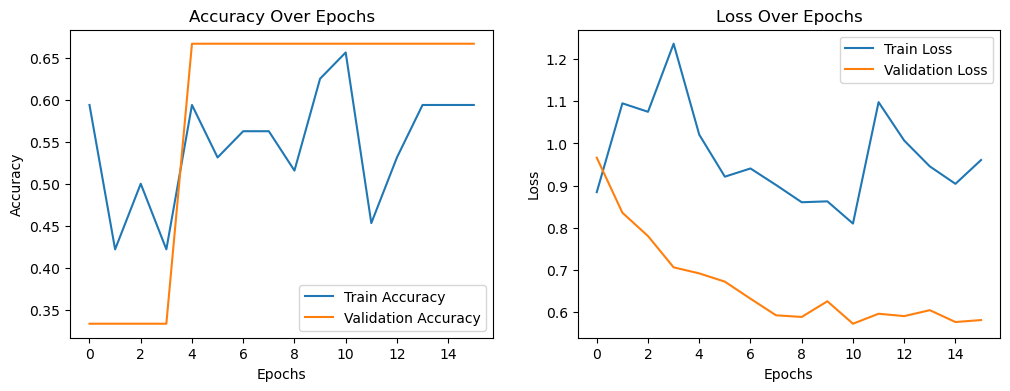

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import RMSprop

# Paths to the dataset
train_data_dir = "pcb_data/train"  # Replace with your training folder path
test_data_dir = "pcb_data/test"    # Replace with your test folder path

# Image dimensions
IMG_HEIGHT, IMG_WIDTH = 128, 128  # Image size for MobileNetV2
BATCH_SIZE = 64                   # Larger batch size for smoother gradients

# Data augmentation and normalization for training
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,          # Normalize pixel values
    rotation_range=40,          # Increased random rotation
    width_shift_range=0.4,      # Increased horizontal shift
    height_shift_range=0.4,     # Increased vertical shift
    shear_range=0.4,            # Increased shearing transformation
    zoom_range=0.4,             # Increased random zoom
    horizontal_flip=True,       # Flip images horizontally
    fill_mode="nearest"         # Fill in missing pixels
)

# Rescale only for validation/testing (no augmentation)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="binary"  # Binary classification: "good" (1) and "bad" (0)
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="binary"
)

# Use Pretrained MobileNetV2 as the feature extractor
base_model = MobileNetV2(input_shape=(
    IMG_HEIGHT, IMG_WIDTH, 3), include_top=False, weights="imagenet")
base_model.trainable = True  # Allow fine-tuning

# Freeze all layers except the last 50 for fine-tuning
for layer in base_model.layers[:-50]:
    layer.trainable = False

# Build the model
model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation="relu"),  # Fully connected layer
    Dropout(0.2),                   # Reduced dropout for better balance
    Dense(1, activation="sigmoid")  # Sigmoid for binary classification
])

# Compile the model with RMSprop optimizer and a reduced learning rate
model.compile(
    # RMSprop for more stable training
    optimizer=RMSprop(learning_rate=0.00001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# Compute class weights if the dataset is imbalanced
class_weights = {0: 1.5, 1: 1.0}  # Adjust weights based on class proportions

# Callbacks for training
early_stopping = EarlyStopping(
    monitor="val_loss", patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint(
    "best_model.h5", monitor="val_loss", save_best_only=True)

# Train the model
history = model.fit(
    train_generator,
    epochs=30,  # Increase epochs for better optimization
    validation_data=test_generator,
    class_weight=class_weights,  # Apply class weights
    callbacks=[early_stopping, model_checkpoint]
)

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Define the folder to save the plots
folder = "accuracy"
os.makedirs(folder, exist_ok=True)  # Ensure the folder exists

# Get the next available number for the filename
existing_files = [f for f in os.listdir(folder) if f.startswith(
    "training_plot") and f.endswith(".png")]
next_number = 1 + max(
    [int(f.split("_")[2].split(".")[0])
     for f in existing_files if f.split("_")[2].split(".")[0].isdigit()],
    default=0
)

# Save the plot with the next number
filename = f"training_plot_3_{next_number}.png"
plt.savefig(os.path.join(folder, filename))

print(f"Plot saved as {filename} in the '{folder}' folder.")

plt.show()

Found 64 images belonging to 2 classes.
Found 19 images belonging to 2 classes.
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5234 - loss: 6.0606

2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.5104 - loss: 6.0852 - val_accuracy: 0.4211 - val_loss: 5.8461
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 961ms/step - accuracy: 0.4766 - loss: 6.2742

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.4792 - loss: 6.3149 - val_accuracy: 0.4211 - val_loss: 5.8208
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5391 - loss: 6.1773

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.5521 - loss: 6.1587 - val_accuracy: 0.4737 - val_loss: 5.7418
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.6562 - loss: 6.1148 - val_accuracy: 0.4737 - val_loss: 5.7563
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5938 - loss: 6.1212

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.5729 - loss: 6.1503 - val_accuracy: 0.4737 - val_loss: 5.7280
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.6250 - loss: 5.8826 - val_accuracy: 0.4737 - val_loss: 5.7315
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5312 - loss: 6.3449

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.5312 - loss: 6.3334 - val_accuracy: 0.5263 - val_loss: 5.7186
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.5521 - loss: 6.3866 - val_accuracy: 0.4737 - val_loss: 5.7371
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.5625 - loss: 6.1428 - val_accuracy: 0.4737 - val_loss: 5.7338
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.5938 - loss: 6.0895 - val_accuracy: 0.4737 - val_loss: 5.7208
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.4271 - loss: 6.2531 - val_accuracy: 0.4737 - val_loss: 5.7254
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5078 - loss: 6.2813

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.5000 - loss: 6.2921 - val_accuracy: 0.5263 - val_loss: 5.7176
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6094 - loss: 5.9697

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.5938 - loss: 5.9846 - val_accuracy: 0.5789 - val_loss: 5.6891
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5703 - loss: 5.8578

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.5729 - loss: 5.8724 - val_accuracy: 0.5789 - val_loss: 5.6776
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.5521 - loss: 6.1171 - val_accuracy: 0.5789 - val_loss: 5.6889
Epoch 16/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6719 - loss: 5.8672

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.6667 - loss: 5.8899 - val_accuracy: 0.5789 - val_loss: 5.6751
Epoch 17/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.5104 - loss: 6.3771 - val_accuracy: 0.5789 - val_loss: 5.6754
Epoch 18/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.5521 - loss: 6.1225 - val_accuracy: 0.5789 - val_loss: 5.6852
Epoch 19/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5312 - loss: 6.2917

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.5417 - loss: 6.2644 - val_accuracy: 0.5789 - val_loss: 5.6750
Epoch 20/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.5729 - loss: 5.8642 - val_accuracy: 0.5789 - val_loss: 5.6750
Epoch 21/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5938 - loss: 5.9188

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.5938 - loss: 5.9241 - val_accuracy: 0.5789 - val_loss: 5.6483
Epoch 22/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.6875 - loss: 5.8143 - val_accuracy: 0.5789 - val_loss: 5.6555
Epoch 23/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5781 - loss: 6.0466

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.5938 - loss: 6.0292 - val_accuracy: 0.5789 - val_loss: 5.6416
Epoch 24/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5391 - loss: 6.0938

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.5312 - loss: 6.1084 - val_accuracy: 0.7368 - val_loss: 5.6233
Epoch 25/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.7083 - loss: 5.9118 - val_accuracy: 0.6842 - val_loss: 5.6253
Epoch 26/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6328 - loss: 5.9293

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.6250 - loss: 5.9645 - val_accuracy: 0.7368 - val_loss: 5.6163
Epoch 27/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6250 - loss: 6.0827

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.6354 - loss: 6.0440 - val_accuracy: 0.7895 - val_loss: 5.6040
Epoch 28/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.5104 - loss: 6.2035 - val_accuracy: 0.6842 - val_loss: 5.6294
Epoch 29/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.5417 - loss: 6.1485 - val_accuracy: 0.7895 - val_loss: 5.6216
Epoch 30/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.6146 - loss: 5.8555 - val_accuracy: 0.7895 - val_loss: 5.6172
Epoch 31/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.5000 - loss: 6.1447 - val_accuracy: 0.7895 - val_loss: 5.6157
Epoch 32/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.6250 - loss: 5.9912 - val_accuracy: 0.7368 - val_loss: 5.6233
Epoch 33/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.5729 - loss: 6.0163 - val_accuracy: 0.7895 - val_loss: 5.6215
Epoch 34/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.6458 - loss: 5.9850 - val_accuracy: 0.6842 - val_loss: 5.6303
Epoch 35/50
2/2 ━━━━

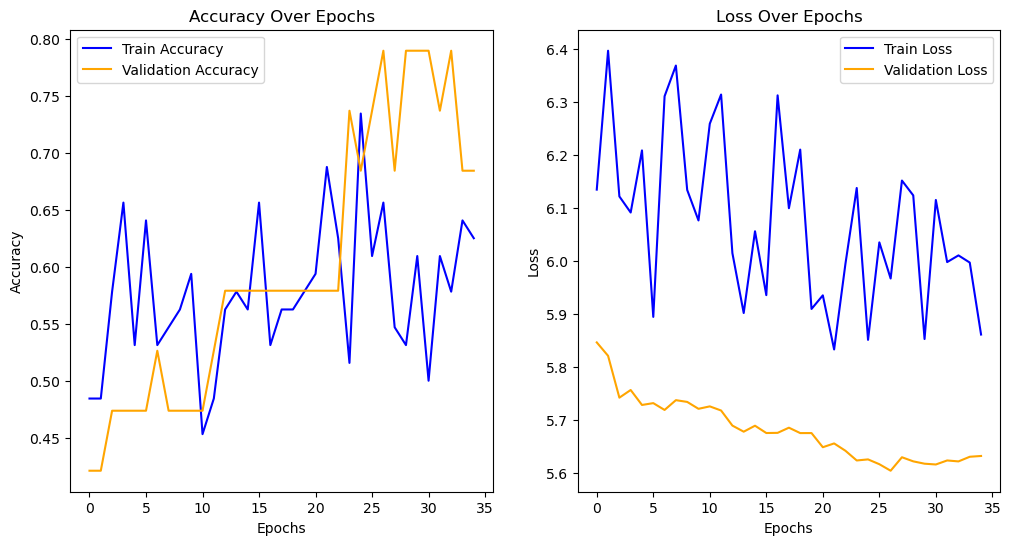

In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import RMSprop

# Paths to the dataset
train_data_dir = "pcb_data/train"  # Replace with your training folder path
test_data_dir = "pcb_data/test"    # Replace with your test folder path

# Image dimensions
IMG_HEIGHT, IMG_WIDTH = 128, 128
BATCH_SIZE = 32  # Reduced batch size for finer gradient updates

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=30,         # Reduced rotation for better generalization
    width_shift_range=0.3,     # Adjusted horizontal shift
    height_shift_range=0.3,    # Adjusted vertical shift
    shear_range=0.3,           # Adjusted shearing
    zoom_range=0.3,            # Adjusted zoom range
    horizontal_flip=True,
    fill_mode="nearest"
)

# Rescale for validation/testing (no augmentation)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="binary"
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="binary"
)

# Load MobileNetV2 as the feature extractor
base_model = MobileNetV2(input_shape=(
    IMG_HEIGHT, IMG_WIDTH, 3), include_top=False, weights="imagenet")
base_model.trainable = True  # Allow fine-tuning

# Freeze all layers except the last 50
for layer in base_model.layers[:-50]:
    layer.trainable = False

# Build the model
model = Sequential([
    base_model,
    Flatten(),
    # Added L2 regularization
    Dense(256, activation="relu", kernel_regularizer="l2"),
    # Increased dropout rate
    Dropout(0.4),
    Dense(1, activation="sigmoid")
])

# Compile the model
model.compile(
    # Reduced learning rate for stability
    optimizer=RMSprop(learning_rate=0.000005),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# Compute class weights for imbalanced datasets
class_weights = {0: 1.5, 1: 1.0}  # Adjust based on dataset proportions

# Define callbacks
early_stopping = EarlyStopping(
    monitor="val_loss", patience=8, restore_best_weights=True  # Increased patience
)
model_checkpoint = ModelCheckpoint(
    "best_model.h5", monitor="val_loss", save_best_only=True
)

# Train the model
history = model.fit(
    train_generator,
    epochs=50,  # Increased epochs to allow for stabilization
    validation_data=test_generator,
    class_weight=class_weights,
    callbacks=[early_stopping, model_checkpoint]
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy", color="blue")
plt.plot(history.history["val_accuracy"],
         label="Validation Accuracy", color="orange")
plt.title("Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss", color="blue")
plt.plot(history.history["val_loss"], label="Validation Loss", color="orange")
plt.title("Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Save the plots
output_dir = "plots"
os.makedirs(output_dir, exist_ok=True)

# Save plots dynamically
existing_files = [f for f in os.listdir(output_dir) if f.startswith(
    "training_plot") and f.endswith(".png")]
next_index = max(
    [int(f.split("_")[2].split(".")[0]) for f in existing_files if f.split("_")[2].isdigit()], default=0
) + 1
filename = f"training_plot_{next_index}.png"
plt.savefig(os.path.join(output_dir, filename))

print(f"Training plots saved as {filename} in '{output_dir}'.")

plt.show()